In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Data Understanding

In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

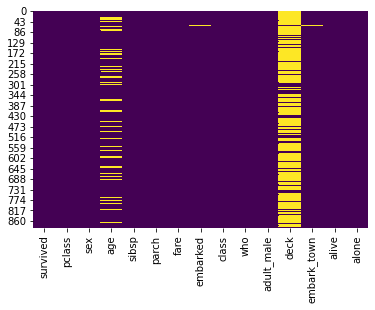

In [7]:
sns.heatmap(titanic.isnull(), cbar=False, cmap = 'viridis')

In [8]:
## check missing value
titanic['age'].isnull().sum()/titanic.shape[0] * 100

19.865319865319865

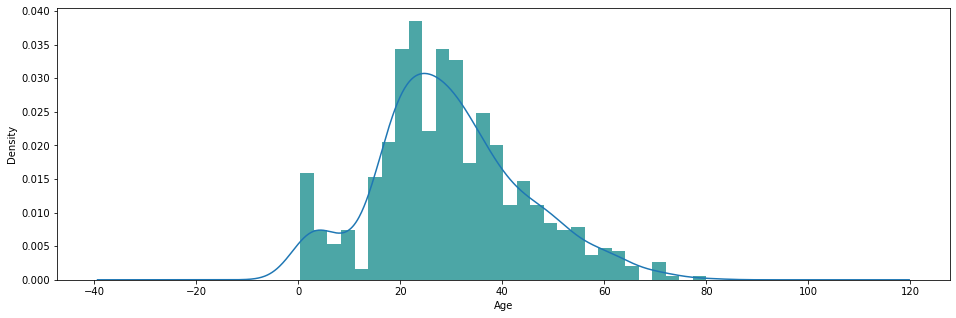

In [9]:
ax = titanic['age'].hist(bins = 30, density = True, stacked = True, color = 'teal', alpha = 0.7, figsize = (16, 5))
titanic['age'].plot(kind = 'density')
ax.set_xlabel('Age')
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

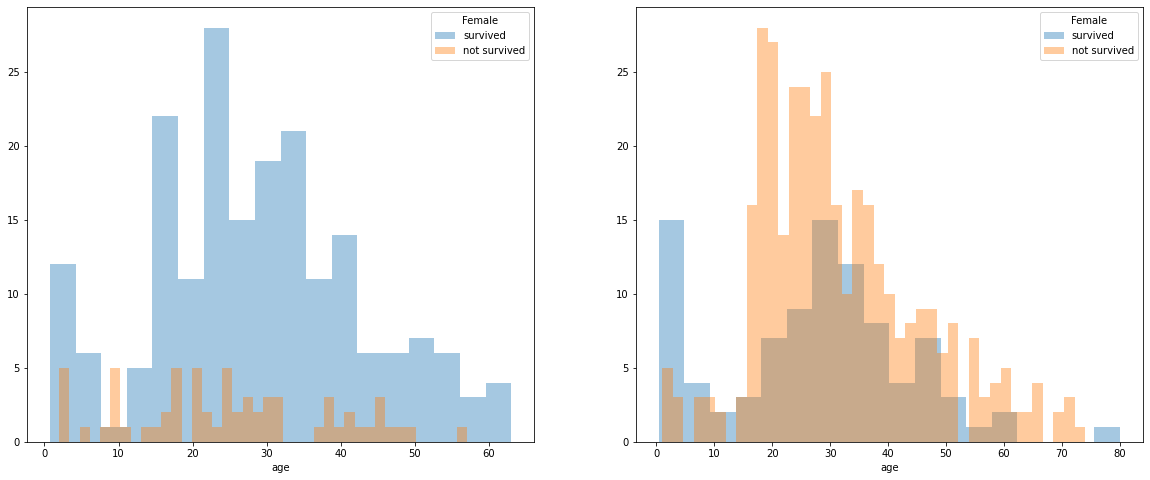

In [10]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,8))
women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']

ax = sns.distplot(women[women[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False)
ax = sns.distplot(women[women[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False)
ax = ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men[survived]==1].age.dropna(), bins = 18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men[survived]==0].age.dropna(), bins = 40, label = not_survived, ax = axes[1], kde = False)
ax = ax.legend()
ax.set_title('Female')

In [11]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

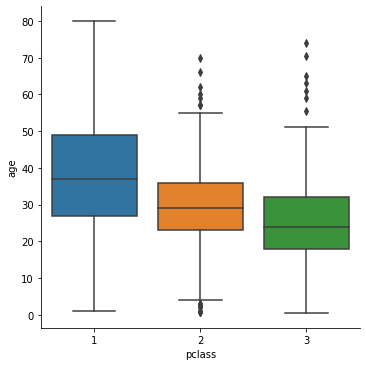

In [12]:
sns.catplot(x = 'pclass', y = 'age', data = titanic, kind = 'box')

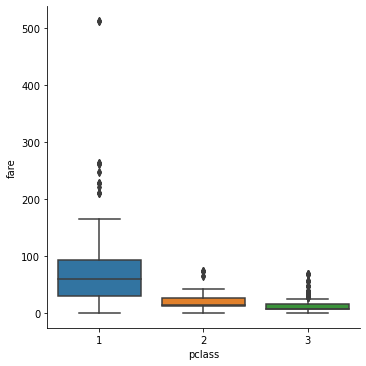

In [13]:
sns.catplot(x = 'pclass', y = 'fare', data = titanic, kind ='box')

In [14]:
titanic[titanic['pclass'] == 1]['age'].mean()

38.233440860215055

In [15]:
titanic[titanic['pclass'] == 2]['age'].mean()

29.87763005780347

In [16]:
titanic[titanic['pclass'] == 3]['age'].mean()

25.14061971830986

In [17]:
def impute_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return titanic[titanic['pclass'] == 1]['age'].mean()
        elif pclass == 2:
            return titanic[titanic['pclass'] == 2]['age'].mean()
        elif pclass == 3:
            return titanic[titanic['pclass'] == 3]['age'].mean()
        
    else:
        return age

In [18]:
titanic['age'] = titanic[['age', 'pclass']].apply(impute_age, axis =1)

<AxesSubplot:>

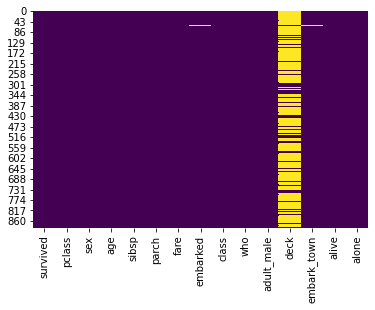

In [19]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

## Analysing Embarked

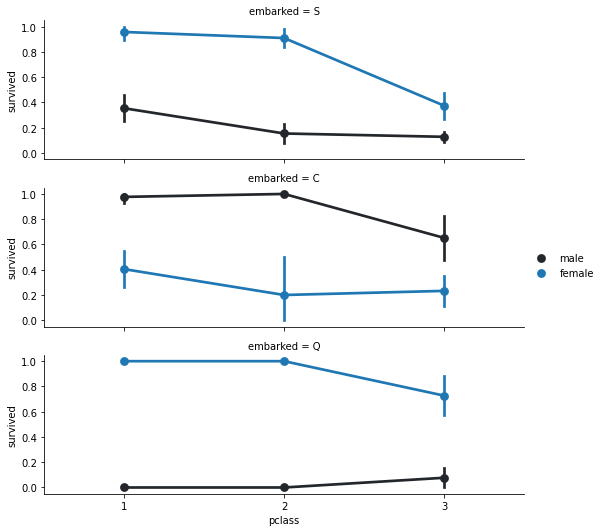

In [20]:
f = sns.FacetGrid(titanic, row='embarked', height = 2.5, aspect =3)
f.map(sns.pointplot, 'pclass', 'survived', 'sex', order = None, hue_order = None)
f.add_legend()

In [21]:
titanic['embarked'].isnull().sum()

2

In [22]:
titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [23]:
common_value = 'S'
titanic['embarked'].fillna(common_value, inplace=True)

In [24]:
titanic['embarked'].isnull().sum()

0

<AxesSubplot:>

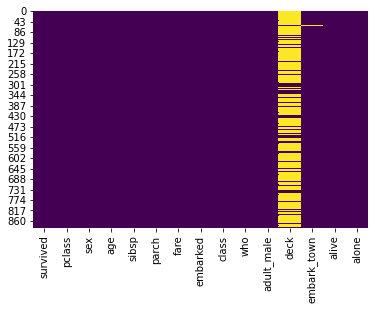

In [25]:
sns.heatmap(titanic.isnull(), cbar = False, cmap = 'viridis')

In [26]:
titanic.drop(labels=['deck', 'embark_town', 'alive'], inplace=True,axis=True)

<AxesSubplot:>

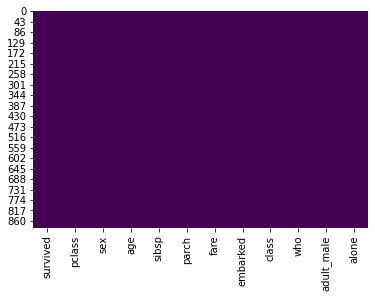

In [27]:
sns.heatmap(titanic.isnull(), cbar= False, cmap = 'viridis')

In [28]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB


In [29]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True


In [30]:
titanic['fare'] = titanic['fare'].astype('int')
titanic['age'] = titanic['age'].astype('int')
titanic['pclass'] = titanic['pclass'].astype('int')

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int32   
 2   sex         891 non-null    object  
 3   age         891 non-null    int32   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int32   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), int32(3), int64(3), object(3)
memory usage: 55.0+ KB


### convert categorical data into numerical data

In [31]:
genders = {'male':0, 'female':1}
titanic['sex'] = titanic['sex'].map(genders)

In [32]:
titanic.head(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,man,True,False
1,1,1,1,38,1,0,71,C,First,woman,False,False
2,1,3,1,26,0,0,7,S,Third,woman,False,True
3,1,1,1,35,1,0,53,S,First,woman,False,False
4,0,3,0,35,0,0,8,S,Third,man,True,True
5,0,3,0,25,0,0,8,Q,Third,man,True,True
6,0,1,0,54,0,0,51,S,First,man,True,True


In [33]:
who = {'man':0, 'woman': 1, 'child':2}
titanic['who'] = titanic['who'].map(who)

In [34]:
adult_male = {True: 1, False:0}
titanic['adult_male'] = titanic['adult_male'].map(adult_male)

In [35]:
alone = {True: 1, False:0}
titanic['alone'] = titanic['alone'].map(alone)

In [36]:
ports = {'S' : 0, 'C' : 1, 'Q' : 2}
titanic['embarked'] = titanic['embarked'].map(ports)

In [37]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0,Third,0,1,0
1,1,1,1,38,1,0,71,1,First,1,0,0
2,1,3,1,26,0,0,7,0,Third,1,0,1
3,1,1,1,35,1,0,53,0,First,1,0,0
4,0,3,0,35,0,0,8,0,Third,0,1,1


In [38]:
titanic.drop(labels = ['class', 'who'], axis = 1, inplace= True)

In [39]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


## Build Logistic Regression Model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
X = titanic.drop('survived', axis=1)
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [43]:
X_train.shape

(596, 9)

In [44]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 200)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
## accuracy
model.score(X_test, y_test)

0.8271186440677966

In [58]:
from sklearn.feature_selection import RFE

In [59]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
rfe = RFE(model, 5, verbose=1)
rfe = rfe.fit(X, y)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [54]:
X.shape

(891, 9)

In [60]:
rfe.support_

array([ True, False, False,  True,  True, False, False,  True,  True])

In [61]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,0,3,0,22,1,0,7,0,1,0
1,1,1,1,38,1,0,71,1,0,0
2,1,3,1,26,0,0,7,0,0,1
3,1,1,1,35,1,0,53,0,0,0
4,0,3,0,35,0,0,8,0,1,1


In [62]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
0,3,0,22,1,0,7,0,1,0
1,1,1,38,1,0,71,1,0,0
2,3,1,26,0,0,7,0,0,1
3,1,1,35,1,0,53,0,0,0
4,3,0,35,0,0,8,0,1,1


In [63]:
XX = X[X.columns[rfe.support_]]

In [65]:
XX.head()

,pclass,sibsp,parch,adult_male,alone
0,3,1,0,1,0
1,1,1,0,0,0
2,3,0,0,0,1
3,1,1,0,0,0
4,3,0,0,1,1


In [70]:
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size = 0.2, random_state = 8, stratify = y)

In [71]:
X_train.shape

(712, 5)

In [74]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = X_test

In [75]:
model.score(X_test, y_test)

0.8547486033519553

In [91]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, auc, log_loss, roc_curve

In [101]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 500)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [102]:
y_predict_prob = model.predict_proba(X_test)[:, 1]

In [103]:
[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)

In [107]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('log loss: ', log_loss(y_test, y_predict_prob))
print('auc: ', auc(fpr, tpr,))

Accuracy:  0.8547486033519553
log loss:  0.36597373727139876
auc:  0.9007246376811595


In [108]:
idx = np.min(np.where(tpr>0.95))
idx

27

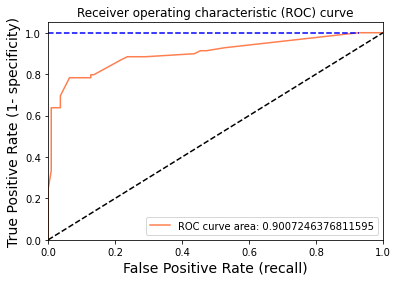

Using a threshold of 0.094 guearentees as sensitivity of 1.000 and specificity of 0.073 , i.e. a false positive rate of 92.73%. 


In [125]:
plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = 'ROC curve area: ' + str(auc(fpr,tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')

plt.xlim([0,1.0]) ##panjang garis x
plt.ylim([0.0, 1.05]) ##panjang garis y
plt.xlabel('False Positive Rate (recall)', fontsize=14)
plt.ylabel('True Positive Rate (1- specificity)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guearentees as sensitivity of %.3f " % tpr[idx] + "and specificity of %.3f "
     % (1-fpr[idx]) + ", i.e. a false positive rate of %.2f%%. " % (np.array(fpr[idx])*100))